 <table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. Created for CS/MATH 3414 by Arash Sarshar.</td>
 <td> </td>
</table> 

## Taylor series expansion for smooth functions

If f(x) is a __smooth__ function
$f : \mathbb{R}\to  \mathbb{R} $:

$$
\begin{align*}
 f(x_0 + \Delta x) & \approx f(x_0) + \frac{ f'(x_0)}{1!} \Delta x + \frac{f''(x_0)}{2!} (\Delta x)^2 + \frac{f'''(x_0)}{3!} (\Delta x)^3+\dotsb \\
 &= \sum_{k=0}^\infty \frac{f^{\left(k\right)}(x_0)}{k!} (\Delta x)^k.
\end{align*}
$$

Since $\Delta_x = x-x_0$ the equivalent form of the Taylor expansion is:

$$
\begin{align*}
 f(x) & \approx f(x_0) + \frac{ f'(x_0)}{1!} (x-x_0) + \frac{f''(x_0)}{2!} (x-x_0)^2 + \frac{f'''(x_0)}{3!} (x-x_0)^3+\dotsb \\
 &= \sum_{k=0}^\infty \frac{f^{\left(k\right)}(x_0)}{k!} (x-x_0)^k.
\end{align*}
$$

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

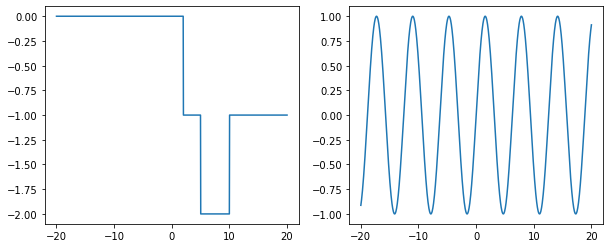

In [33]:

x = np.linspace(-20,20,1000)
f1 = np.heaviside(x-10,1) - np.heaviside(x-5,1) - np.heaviside(x-2,1)
fig = plt.figure(figsize=(10,4))
fig.add_subplot(121)
plt.plot(x,f1)
fig.add_subplot(122)
plt.plot(x, np.sin(x))

### Examples

Let's expand $f(x) = sin(x)$ near $x_0 = 0$: 
$$
\begin{align*}
 f(x) & \approx f(x_0) + \frac{ f'(x_0)}{1!} (x-x_0) + \frac{f''(x_0)}{2!} (x-x_0)^2 + \frac{f'''(x_0)}{3!} (x-x_0)^3+\dotsb \\
  & = \sin(0)    +\cos(0) x  - \frac{\sin(0)}{2!} x^2 - \frac{\cos(0)}{3!} x^3 + \dotsb \\
  & = x - \frac{x^3}{3!}  + \frac{x^5}{5!} - \dotsb \\
  & = \sum_{k=0}^{\infty} \frac{(-1)^{k}}{(2k+1)!} x^{2k+1}.
\end{align*}
$$

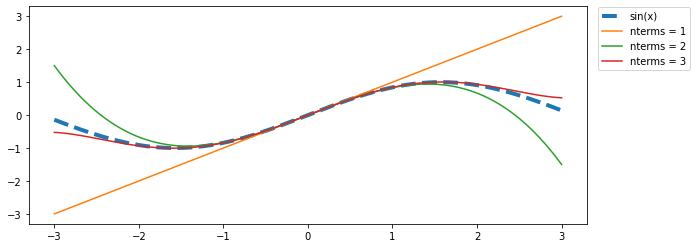

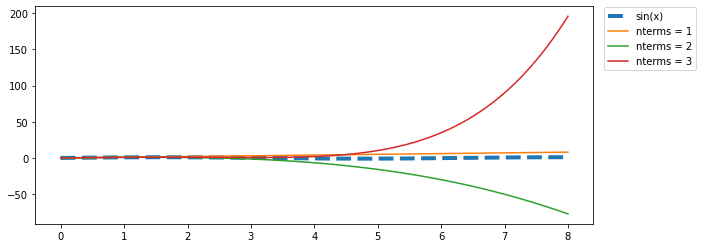

In [34]:
def series1(x,nterms):
    s = x.copy()
    
    for term in range(1, nterms+1):
        s = s + ((-1)**(term))/math.factorial(2*term+1)* np.power(x,2*term+1)
    return s


def make_plot(x):

    legends = ['sin(x)']
    fig = plt.figure(figsize=(10,4))
    plt.plot(x,np.sin(x), '--', lw=4)

    for idx in range(3):
        plt.plot(x,series1(x,idx))
        legends.append('nterms = %d'%(idx+1))
    plt.legend(legends, bbox_to_anchor=(1.01, 1.02))


x = np.linspace(-3,3,1000)
make_plot(x)
x = np.linspace(0,8,1000)
make_plot(x)

__Note__ that:

* The Taylor series gives you apolynomial in $(x-x_0)^n.$
* You can use change of variables to derive Taylor series for complicated functions

### Examples: 
What is the Taylor series of $f(x) = (x-1)^2$ near $x_0=0?$



$ (x-1)^2 =  x^2 -2x +1  $

What is the Taylor series of $f(x) = \sin{\frac{1}{x}}$ as $x \to \infty?$

$$ 
\begin{align*}
\sin{t} &= \sum_{k=0}^{\infty} \frac{(-1)^{k}}{(2k+1)!} t^{2k+1}, \quad t\ll 1, \\[10pt]
t &= \frac{1}{x}, \quad  t \to 0 \quad \text{as} \quad x \to \infty, \\[10pt]
\sin{\frac{1}{x}} &= \sum_{k=0}^{\infty} \frac{(-1)^{k}}{(2k+1)!} x^{-2k-1}, \quad x \gg 1.
\end{align*}
$$

###  Some application of Taylor series 

####  Resolving limits 

We are interested in finding  $ \lim_{x \to 0} \frac{sin(x)}{x}:$
<!-- $$
\begin{align*}
\frac{sin(x)}{x} & \approx \frac{1}{x} \left( \sum_{k=0}^{\infty} \frac{(-1)^{k}}{(2k+1)!} x^{2k+1} \right)  \\
  &= \sum_{k=0}^{\infty} \frac{(-1)^{k}}{(2k+1)!} x^{2k},
\end{align*}
$$

and as a result, the limit is
$$
\begin{align*}
  \lim_{x \to 0} \frac{sin(x)}{x} &= 1.
\end{align*}
$$ -->

$$
 sin(x)/x =1/x * sin(x) =  \frac{(x - \frac{x^3}{3!}  + \frac{x^5}{5!})}{x} = 1 - x^2/ 3! + ...
$$

<ipython-input-35-da214714a151>:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x, np.sin(x)/x)


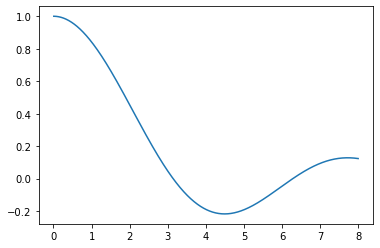

In [35]:
plt.plot(x, np.sin(x)/x)

### Avoiding cancelation errors 

Consider evaluating  $f(x) = \ln(x+1) - \ln(x)$ for $x \gg 1$. 

$$ f(x) = \ln(x+1) - \ln(x) = \ln(\frac{x+1}{x}) = \ln(1 + \frac{1}{x}) = \ln(1+t)$$
$$  \ln(1+t) = t - \frac{t^2}{2} + \frac{t^{3}}{3} - \frac{t^4}{4} + \dotsb $$

Now, we substitute $t = \frac{1}{x}$

<!-- ![Alt Text](image path "title") -->
![User:Yearofthedragon](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Computer.Science.AI.Neuron.svg/800px-Computer.Science.AI.Neuron.svg.png "Perceptron model") CC-3.0 User:Yearofthedragon


Aproximate a perceptron model output with a rational function
$$ Y = f(\hat  x)  =  \tanh(w_1 x_1 + w_2 x_2) \approx \frac{R(\hat x)}{Q(\hat x)}.$$

Using the change of variable $\hat x = w_1 x_1 + w_2 x_2 $:

$$ 
\tanh(\hat x) = \frac{\sinh(\hat x)}{\cosh(\hat x)} = \frac{e^{\hat x} - e^{-\hat x} }{e^{\hat x} + e^{-\hat x}}.
$$

$$
\begin{align*}
e^x &= 1 + x + \frac{x^2}{2!} + \dotsb = \sum_{k=0}^{\infty} \frac{x^k}{k!},\\
e^{-x} &= 1 + (-x) + \frac{(-x)^2}{2!} +  \dotsb = \sum_{k=0}^{\infty} (-1)^k \frac{x^k}{k!}.
\end{align*}
$$

$$

$$

$$e^x - e^{-x} = 2 \left(  x + \frac{x^3}{3!} + \frac{x^5}{5!} + \dotsb  \right)$$

$$e^x + e^{-x} = 2 \left( 1 + \frac{x^2}{2} + \frac{x^4}{4!} + \dotsb \right)$$

$$
\tanh(x) \approx \frac{ \left(  x + \frac{x^3}{3!} + \frac{x^5}{5!} + \dotsb  \right)}{ \left( 1 + \frac{x^2}{2} + \dotsb \right)}
$$

<!-- $\frac{d}{dx} \sinh{x} ?$ 

$ \frac{1}{x+1} ?$ -->